# Sales Data Analysis with Python

### Objectives


Upon initial inspection of the data, we can start thinking of some questions about it that we would like to answer the following questions:

1. What is the overall sales trend?

2. Which are the Top 10 products by sales?

3. Which are the Most Selling Products?

4. Which is the most preferred Ship Mode?

5. Which are the Most Profitable Category and Sub-Category?

### Importing Required Libraries 

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Importing The Dataset

In [ ]:
df = pd.read_excel('superstore.xlsx')

### Data Audit


You can’t make your data work for you until you know what data you’re talking about.

To get a quick idea of what the data looks like, we can call the head function on the data frame. By default, this returns the top five rows, but it can take in a parameter of how many rows to return.

In [ ]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [ ]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [ ]:
df.shape

(51290, 21)

In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [ ]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [ ]:
df.describe().round()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.0,3.0,0.0,29.0,26.0,2013.0
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,31.0,2.0,0.0,0.0,3.0,2012.0
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.0,3.0,0.0,9.0,8.0,2013.0
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.0,5.0,0.0,37.0,24.0,2014.0
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.0,14.0,1.0,8400.0,934.0,2014.0
std,NaN,NaN,488.0,2.0,0.0,174.0,57.0,1.0


### Exploratory Data Analysis

1. What is the overall sales trend?

In [14]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [15]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [16]:
# Getting month year from order_date
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [18]:
# Grouping month year
df_trend = df.groupby('month_year', as_index=False)['sales'].sum()

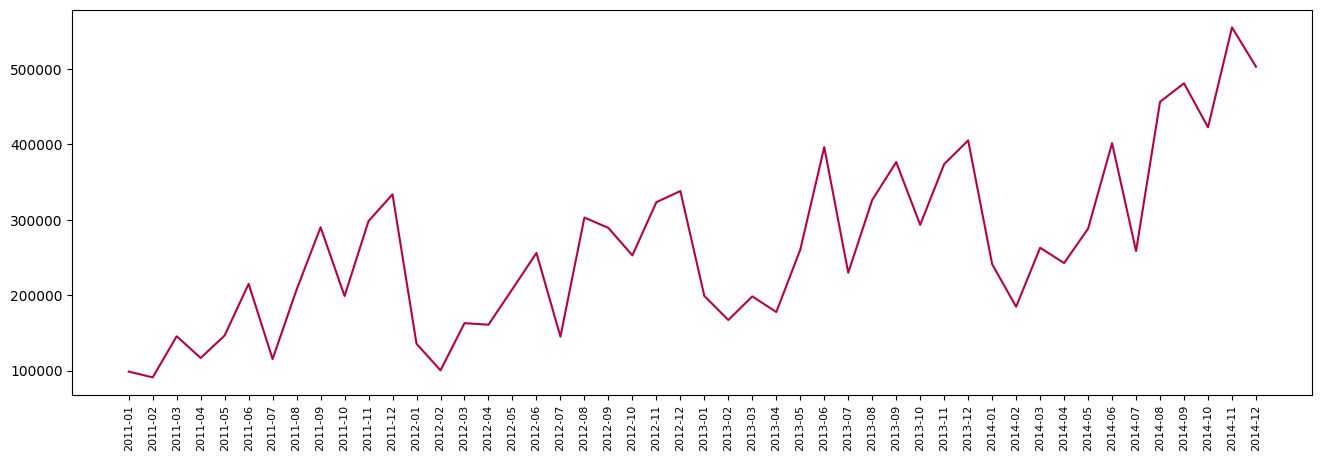

In [19]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_trend['month_year'], df_trend['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

2. Which are the Top 10 products by sales?

In [21]:
# Grouping the product_name column and summing sales
prod_sales = df.groupby('product_name', as_index=False)['sales'].sum()

# Sorting the sales column in descending order
prod_sales = prod_sales.sort_values(by='sales', ascending=False)

# Selecting the top 10 products by sales
top_10_products = prod_sales[:10]

print(top_10_products)

                                           product_name       sales
310                        Apple Smart Phone, Full Size  86935.7786
970                        Cisco Smart Phone, Full Size  76441.5306
2415                    Motorola Smart Phone, Full Size  73156.3030
2501                       Nokia Smart Phone, Full Size  71904.5555
866               Canon imageCLASS 2200 Advanced Copier  61599.8240
1837         Hon Executive Leather Armchair, Adjustable  58193.4841
2631  Office Star Executive Leather Armchair, Adjust...  50661.6840
1714  Harbour Creations Executive Leather Armchair, ...  50121.5160
2988                      Samsung Smart Phone, Cordless  48653.4600
2502                  Nokia Smart Phone, with Caller ID  47877.7857


3. Which are the Most Selling Products?

In [22]:
# Grouping the product names and summing only the 'quantity' column
most_selling_prods = df.groupby('product_name', as_index=False)['quantity'].sum()

# Sorting the products by quantity sold in descending order
most_selling_prods = most_selling_prods.sort_values(by='quantity', ascending=False)

# Top 10 products sold by quantity
most_selling_prods[:10]

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


4. Which is the most preferred Ship Mode?

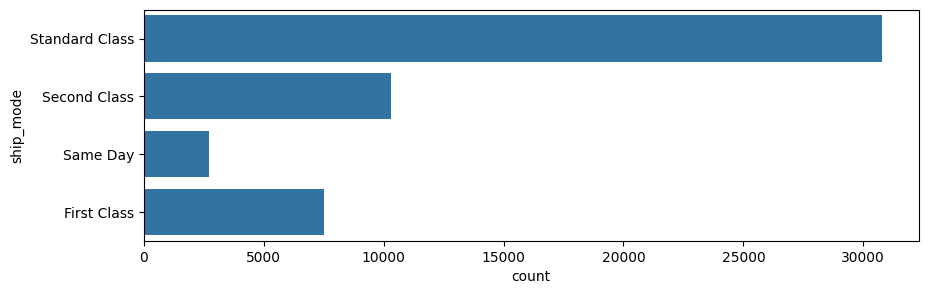

In [17]:
# Setting the figure size
plt.figure(figsize = (10, 3))

# plotting ship mode
sns.countplot(df['ship_mode'])

plt.show()

5. Which are the Most Profitable Category and Sub-Category?

In [23]:
# Grouping products by Category and Sub-Category, summing only 'profit'
cat_subcat = df.groupby(['category', 'sub_category'], as_index=False)['profit'].sum()

# Sorting first by category, then by profit in descending order
cat_subcat = cat_subcat.sort_values(by=['category', 'profit'], ascending=[True, False])

# Display the result
cat_subcat.head()

,category,sub_category,profit
0,Furniture,Bookcases,161924.4195
1,Furniture,Chairs,141973.7975
2,Furniture,Furnishings,46967.4255
3,Furniture,Tables,-64083.3887
4,Office Supplies,Appliances,141680.5894


       End of the project